In [1]:
library('moderndive')
library('tidyverse')
library('purrr')

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Confidence interval

In [2]:
heads_140 = data.frame(
    toss = c(rep('heads', 140), rep('tails', 250 - 140)) |> sample()
)

heads_140 |> head(20)

,toss
,<chr>
1,tails
2,tails
3,tails
4,heads
5,heads
6,heads
7,tails
8,heads
9,tails


The `heads_140` table holds our toss data (140 observed "heads" in 250 tosses) 

In [3]:
heads_140 |> count(toss)

toss,n
<chr>,<int>
heads,140
tails,110


We can use bootstrap resampling to approximate the sampling variability.

In [4]:
# create 1,000 bootstrap replicates 
heads_140_bs = rep_sample_n(heads_140, replace = T, reps = 1000, size = 250)

heads_140_bs |> head()

replicate,toss
<int>,<chr>
1,tails
1,heads
1,heads
1,heads
1,tails
1,tails


For each bootstrap replicate we calculate the number of observed heads.

In [5]:
heads_140_bs_count = heads_140_bs |>
    group_by(replicate) |>
    summarize(n_heads = sum(toss == 'heads')) |>
    mutate(deviation = n_heads - 125)

heads_140_bs_count |> head()

replicate,n_heads,deviation
<int>,<int>,<dbl>
1,141,16
2,140,15
3,133,8
4,145,20
5,143,18
6,132,7


In [6]:
heads_140_bs_count |> nrow()

[1] 1000

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


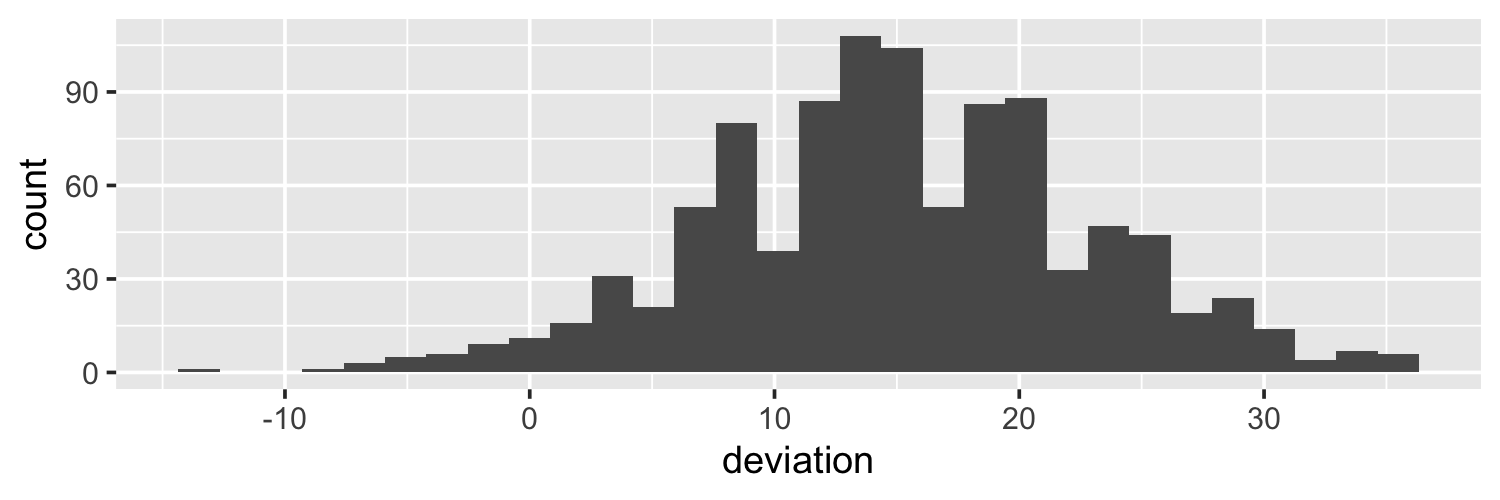

In [7]:
options(repr.plot.width = 6, repr.plot.height = 2, repr.plot.res = 250)
ggplot(heads_140_bs_count, aes(x = deviation)) +
    geom_histogram()

The "confidence interval" for our observation (140 heads) is below. 

**The interval contains zero (i.e. zero is within our interval, how should we interpret this observation?**

In [8]:
heads_140_bs_count |> 
    summarize(
        lower_ci = quantile(deviation, 0.025),
        upper_ci = quantile(deviation, 0.975)
    )

lower_ci,upper_ci
<dbl>,<dbl>
-0.025,30
